Kathryn Young (kmy9ca)

Machine Learning 1:00 pm

02/14/2019


# 1. THE BIG PICTURE

When applying to graduate schools, applicants generally know whether or not they have a good shot at getting in. Some, however, wonder how good their shot is. While an applicant may have a high undergraduate GPA, there is the possibility that they don't test well and score relatively lower on the GRE than they expect out of themselves. The applicant typically doesn't know exactly what each of their statistics means for their chances. If a student can best know their chances of getting into a specific school, they can best target their efforts toward schools that they have a high chance of getting into that are also high on their list.

URL: https://www.kaggle.com/mohansacharya/graduate-admissions

In [996]:
import pandas as pd
import numpy as np

admissions = pd.read_csv("Admission_Predict.csv")
admissions.columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'Statement of Purpose', 'Letters of Rec', 'Undergrad GPA', 'Research', 'Chance of Admit']
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,Statement of Purpose,Letters of Rec,Undergrad GPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [997]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.              400 non-null int64
GRE Score               400 non-null int64
TOEFL Score             400 non-null int64
University Rating       400 non-null int64
Statement of Purpose    400 non-null float64
Letters of Rec          400 non-null float64
Undergrad GPA           400 non-null float64
Research                400 non-null int64
Chance of Admit         400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [998]:
admissions.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,Statement of Purpose,Letters of Rec,Undergrad GPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


This dataset is 28.2 KB large. It has 400 entries and 9 features. 

Statistics wise, the range of GRE scores is relatively high, rangins from 290 to 340. The mean is 316.8. It is also noticeable that every applicant on the list at least has a small chance of getting into the school. The minimum chance of admittance that exists is 34%, which is pretty good for being the minimum.

# 2. DATA DISCOVERY, CLEANING, AND SCALING

Remove columns that clearly have no impact (i.e. Serial No.).

In [999]:
admissions = admissions.drop(['Serial No.'], axis=1)

### Data Discover: Looking at Correlations

In [1000]:
corr_matrix = admissions.corr()
print(corr_matrix)

                      GRE Score  TOEFL Score  University Rating  \
GRE Score              1.000000     0.835977           0.668976   
TOEFL Score            0.835977     1.000000           0.695590   
University Rating      0.668976     0.695590           1.000000   
Statement of Purpose   0.612831     0.657981           0.734523   
Letters of Rec         0.557555     0.567721           0.660123   
Undergrad GPA          0.833060     0.828417           0.746479   
Research               0.580391     0.489858           0.447783   
Chance of Admit        0.802610     0.791594           0.711250   

                      Statement of Purpose  Letters of Rec  Undergrad GPA  \
GRE Score                         0.612831        0.557555       0.833060   
TOEFL Score                       0.657981        0.567721       0.828417   
University Rating                 0.734523        0.660123       0.746479   
Statement of Purpose              1.000000        0.729593       0.718144   
Letters of 

It looks like All of the features are pretty correlated with chance of admittance to some degree. Some are more correlated than others. For example, features such as GRE score, TOEFL Score, rating of previous university, and undergraduate GPA, all have above 0.7 correlation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12581d908>,
      dtype=object)

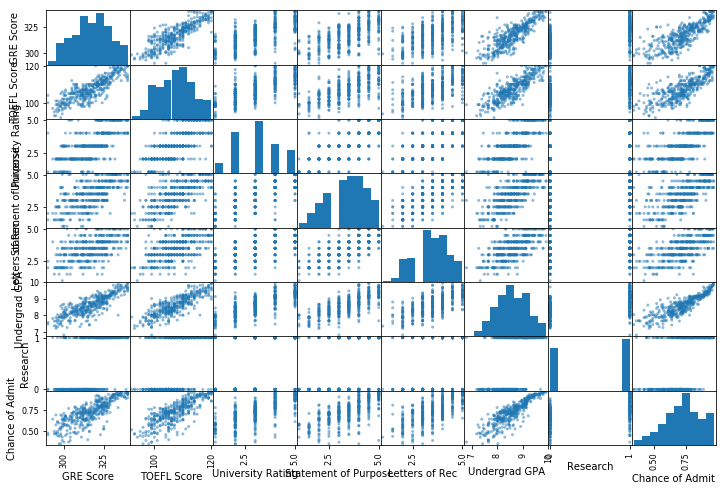

In [1001]:
from pandas.plotting import scatter_matrix
attributes = ['GRE Score', 'TOEFL Score', 'University Rating', 'Statement of Purpose', 'Letters of Rec', 'Undergrad GPA', 'Research', 'Chance of Admit']
scatter_matrix(admissions[attributes], figsize=(12, 8))

### Data Cleaning
Check if any columns have missing values to clean up.

In [1002]:
admissions.isna().any()

GRE Score               False
TOEFL Score             False
University Rating       False
Statement of Purpose    False
Letters of Rec          False
Undergrad GPA           False
Research                False
Chance of Admit         False
dtype: bool

Since there are no NaN values, we do not have to use the imputer to add missing values.

All of this data is numerical so there is no need for OneHotEncoder, which is used when categorical data is present.

### Separate into Training and Testing Data

In [1003]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(admissions, test_size=0.2, random_state=42)

train_set.head()

,GRE Score,TOEFL Score,University Rating,Statement of Purpose,Letters of Rec,Undergrad GPA,Research,Chance of Admit
3,322,110,3,3.5,2.5,8.67,1,0.80
18,318,110,3,4.0,3.0,8.80,0,0.63
202,340,120,5,4.5,4.5,9.91,1,0.97
250,320,104,3,3.0,2.5,8.57,1,0.74
274,315,100,1,2.0,2.5,7.95,0,0.58


In [1004]:
X_train = train_set.drop(['Chance of Admit'], axis=1)
Y_train = train_set['Chance of Admit']
X_test = test_set.drop(['Chance of Admit'], axis=1)
Y_test = test_set['Chance of Admit']


### Feature Scaling

Normalize the value of each feature by subtracting the mean velu of each feature from the dataset, and dividing by the standard deviation.

##### Scale X_train

In [1005]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=['GRE Score', 'TOEFL Score', 'University Rating', 'Statement of Purpose', 'Letters of Rec', 'Undergrad GPA', 'Research'])
X_train_scaled.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


,GRE Score,TOEFL Score,University Rating,Statement of Purpose,Letters of Rec,Undergrad GPA,Research
0,0.457111,0.424662,-0.057308,0.127156,-1.059652,0.139866,0.927613
1,0.102289,0.424662,-0.057308,0.617396,-0.501940,0.361100,-1.078036
2,2.053813,2.085930,1.689221,1.107637,1.171194,2.250095,0.927613
3,0.279700,-0.572099,-0.057308,-0.363084,-1.059652,-0.030313,0.927613
4,-0.163828,-1.236607,-1.803837,-1.343565,-1.059652,-1.085428,-1.078036


##### Scale X_test

In [1006]:
scaler2 = StandardScaler()

scaler2.fit(X_test)
X_test_scaled = pd.DataFrame(scaler2.transform(X_test), columns=['GRE Score', 'TOEFL Score', 'University Rating', 'Statement of Purpose', 'Letters of Rec', 'Undergrad GPA', 'Research'])
X_test_scaled.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,GRE Score,TOEFL Score,University Rating,Statement of Purpose,Letters of Rec,Undergrad GPA,Research
0,-1.285543,-0.525943,-0.155326,-0.020013,0.596819,-0.838184,0.837931
1,-0.464110,-0.847130,-0.155326,1.047342,0.596819,-0.005405,0.837931
2,1.918046,1.079990,1.619824,0.513664,0.596819,1.532032,0.837931
3,0.685897,0.116430,0.732249,1.047342,0.596819,0.667224,0.837931
4,-1.285543,-1.650097,-1.042901,-0.553690,-0.513542,-1.222543,0.837931


### Finnish Converting Values into Proper Formats

In [1007]:
Y_train = Y_train.values
Y_train.shape = (320,1)
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0],1)), X_train_scaled]

costArr = []

# 3. IMPLEMENTATION OF GRADIENT DESCENT

In [1008]:
from numpy.linalg import inv

class MyLinearRegression:
    def __int__ (self):
        self.theta = 0; # parameter vector;
        self.alpha = 0.15; # learning rate
        self.cost  = 0; # cost function
  
    def fitUsingGradientDescent(self, X_train, y_train):
        # implementation code here. calls gradient descent. 
        # set theta here (n + 1) thetas, where n is number of features
        self.theta = np.random.randn(8,1)
        self.alpha = 0.15
        # set alpha here too, alpha determines how well gradient descent works (start with 0.1)
        self.theta, self.cost = self.gradientDescent( X_train, y_train, self.theta, self.alpha, 200)
        # DONT RETURN BECAUSE JUST UPDATES VALUES FOR THETA AND COST
        print(self.theta.shape)
    
    def gradientDescent(self, X_train, y_train, theta, alpha, iters):
        m = 320 ## number of rows
        
        for iteration in range(iters):
            gradients = (2/m) * X_train.T.dot(X_train.dot(theta) - y_train) #find direction
            theta = theta - alpha * gradients #adjust based on direction gradients say
            #update the cost
            self.cost = (1/m) * (X_train.dot(theta) - y_train).T.dot(X_train.dot(theta) - y_train)
            #dimension has to match in dot products
            costArr.append(self.cost[0][0])
        
        return self.theta, self.cost
    
    def predict(self, X_test):
        # implementation code here 
        #self includes self.theta, use x-test.. dot product
        # y hat = theta transpose times x
        # dot product theta and x (theta dot x)
        y_predict = X_test.dot(self.theta)
        return y_predict
    
    
    def fitUsingNormalEquation(self, X_train, y_train):
        # implementation code here for PART 4.
        
        self.theta = inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
        #self.theta = 0;
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(X_train_scaled, Y_train)  
print(costArr)

(8, 1)
[5.294191376190193, 3.3044654551737405, 2.2280673310304624, 1.6118387096890978, 1.2347795601687583, 0.9868796171702364, 0.8122984121963704, 0.6819811511212475, 0.5802805253141156, 0.4983661862093208, 0.4309531561511161, 0.37466179703311236, 0.32718369433429095, 0.2868480688405768, 0.2523890667825839, 0.22281522567108275, 0.19733203929390997, 0.17529300118040653, 0.15616660119771308, 0.13951276595219722, 0.12496525275995728, 0.11221804334822907, 0.101014582115126, 0.09113913205716358, 0.08240976117865934, 0.07467261382459521, 0.06779721039037705, 0.061672578419805536, 0.05620406026154093, 0.051310673686265476, 0.046922925796515566, 0.04298099933039719, 0.03943324541363293, 0.03623492884924622, 0.03334718178416394, 0.03073612952476425, 0.02837215874594522, 0.026229303629685497, 0.024284729800892454, 0.02251829947835912, 0.02091220417048298, 0.0194506536355487, 0.01811961178965176, 0.016906571859042676, 0.015800364400918487, 0.014790992909065187, 0.013869492620456076, 0.01302780888

### Plot with Learning Rates

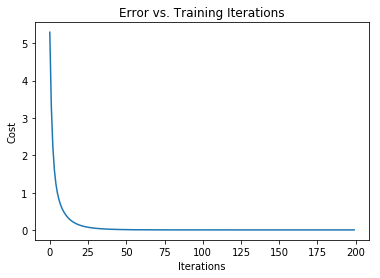

In [1009]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You may plot multiple curves corresponding to different learning rates to justify the best one.
#
import matplotlib.pyplot as plt
plt.plot(costArr) 
plt.title('Error vs. Training Iterations') 
plt.xlabel('Iterations')  
plt.ylabel('Cost')
plt.show()

The best Learning Rate was found to be 0.15, with the cost decreasing until it reached the 0.0038 mark. 

# 4. IMPLEMENTATION OF THE NORMAL EQUATION

No feature scaling required. Still need to add a column of 1's to X matrix for intercept.

In [1010]:
X_train_norm = train_set.drop(['Chance of Admit'], axis=1)
Y_train_norm = train_set['Chance of Admit']
X_test_norm = test_set.drop(['Chance of Admit'], axis=1)
Y_test_norm = test_set['Chance of Admit']

X_train_norm = np.c_[np.ones((X_train_norm.shape[0],1)), X_train_norm]

In [1011]:
import numpy as np

myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train_norm, Y_train_norm)

# 5. COMPARISON OF DIFFERENT IMPLEMENTATIONS

In [1012]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()


scaler3 = StandardScaler()

scaler3.fit(X_train)
X_train_SGD = pd.DataFrame(scaler3.transform(X_train), columns=['GRE Score', 'TOEFL Score', 'University Rating', 'Statement of Purpose', 'Letters of Rec', 'Undergrad GPA', 'Research'])
X_train_SGD.head()
X_train_SGD = np.c_[X_train_SGD]
mySGDModel.fit(X_train_SGD,Y_train)


y_predict = mySGDModel.predict(X_test_scaled)
mse = mean_squared_error(Y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print("Built-in SGD Model: ") 
print(mySGDModel_rmse)
print("")

X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0],1)), X_test_scaled]

y_predict_GradientDescent = myGradientDescentModel.predict(X_test_scaled)
mse_GD = mean_squared_error(Y_test, y_predict)
myGradientDescentModel_rmse = np.sqrt(mse_GD)
print("My Gradient Descent RMSE: ") 
print(myGradientDescentModel_rmse)
print("")

X_test_norm = np.c_[np.ones((X_test_norm.shape[0],1)), X_test_norm]

y_predict_Normal = myNormalEquationModel.predict(X_test_norm)
mse_Normal = mean_squared_error(Y_test_norm, y_predict_Normal)
myNormalEquationModel_rmse = np.sqrt(mse_Normal)
print("Normal Equation RMSE: ") 
print(myNormalEquationModel_rmse )
print("")

#myGradientDescentModel_rmse  
#myNormalEquationModel_rmse 

Built-in SGD Model: 
0.07320863769920948

My Gradient Descent RMSE: 
0.07320863769920948

Normal Equation RMSE: 
0.06794853476919799



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/

It looks like my Normal Equation implementation yields the best performance measure for the data. It has the lowest RMSE. 

Overall, the error is good. The error is in a acceptable bounds compared to what we are predicting. The acceptance rates are within the range of 0 to 1. If the RMSE is only ~0.07, that is a pretty good value relative to the actual values we are trying to predict because it means our predictions aren't very far off.

# 6. PRESENTATION OF YOUR SOLUTION 

In all, the process I implemented was super effective on the admissions dataset. I was able to use multiple mathematical equations to find the best line of regression, meaning the line that the points in the dataset were closest to over all. The vector called "thetas" contains all of the coefficients that will yield this line. In all, the purpose of this assignment was to go "under the hood" of finding the best way to predict the results of the test data based on the training data. This assignment gave me a good grasp of that and how all the mathematical equations we use in class fit together for the best predictions. Moving forward, for efficiency sake, I would handle manipulating the data better so that I only do it one time for all the models instead of doing the same manipulations multiple times (once for each model). In all, the result was success.